<a href="https://colab.research.google.com/github/SobiaNoorAI/Car-Purchasing-Prediction-Machine-Learning-Model/blob/main/Car_Purchasing_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purchasing Prediction Model using Logistic Regression 🚀


# 1️⃣ Problem Statement

Predict whether a customer will make a purchase based on their demographics and online behavior.

#2️⃣ Import Required Libraries

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#3️⃣ Load & Explore Dataset

In [20]:
# Load dataset (Assuming a CSV file)
car_df = pd.read_csv("https://raw.githubusercontent.com/SobiaNoorAI/Car-Purchasing-Prediction-Machine-Learning-Model/main/Data/car_data.csv")

# Display first few rows
print(car_df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


## Data cleaning

In [21]:
# Check for missing values
print(car_df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [22]:
# Check for duplicate values
print(car_df.duplicated().sum())

0


## Explore Data

In [23]:
# info of data like data types
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [24]:
#rows and columns
car_df.shape

(400, 5)

#4️⃣ Preprocessing Data

## Extract Input, Output Variables

In [25]:
# Define features and target variable

# Features or Input data or Independent Variable
x = car_df.drop(["User ID", "Gender", "Purchased"], axis=1)

# Target(1 = Purchased, 0 = Not Purchased) or Output data or Dependent Variable
y = car_df["Purchased"]

# Check if Purchased Column is removed
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [27]:
# Check Purchased Column values
y.head(10)

,Purchased
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


## Split Dataset

In [28]:
# Train-test split (70-30 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape

((280, 2), (120, 2))

## Scaling

In [29]:
# Standardizing numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# To 5 Rows
x_test[:5]

array([[-0.1066347 , -1.0522259 ],
       [ 0.18418721, -0.23512496],
       [-0.1066347 ,  1.42825909],
       [ 0.18418721,  1.54498779],
       [-1.07604106,  1.42825909]])

#5️⃣ Train Model with Logistic Regression

In [30]:
# Initialize and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#6️⃣ Model Evaluation

In [31]:
# Make predictions
y_pred = model.predict(x_test)
# Actual Vs Predicted Output
print("Actual Output:   ", list(y_test))
print("Predicted Output:", list(y_pred))

Actual Output:    [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
Predicted Output: [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.825


In [33]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        72
           1       0.83      0.71      0.76        48

    accuracy                           0.82       120
   macro avg       0.83      0.81      0.81       120
weighted avg       0.83      0.82      0.82       120



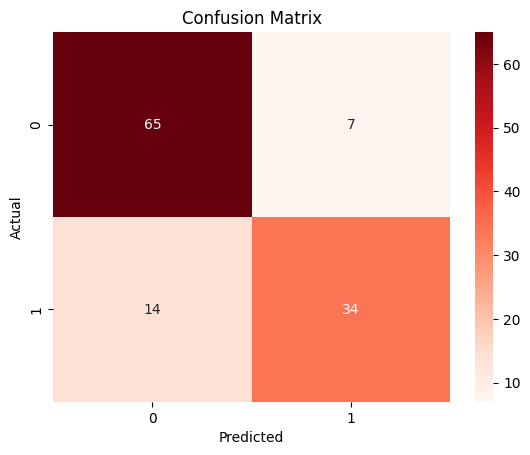

In [34]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#7️⃣ Prediction on New Data

In [40]:

# Predicttion for New Data: Age=46, Salary=100000
new_customer = pd.DataFrame(data=[[46, 100000]], columns=['Age', 'EstimatedSalary'])
new_customer_scaled = scaler.transform(new_customer)
# Predict if they will purchase
purchase_prob = model.predict_proba(new_customer_scaled)[:, 1]
purchase_decision = model.predict(new_customer_scaled)

print(f"Probability of Purchase: {purchase_prob[0]:.2f}")
print(f"Prediction: {'Customer Will Purchase' if purchase_decision[0] == 1 else 'Customer Will Not Purchase'}")


Probability of Purchase: 0.88
Prediction: Customer Will Purchase
